FEATURE EXTRACTION USING MFCC, MELSPECTROGRAM AND LOG-MELSPECTROGRAM

In [1]:
#### Extracting features for every audio file
import pandas as pd
import os
import librosa
import numpy as np
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display

audio_dataset_path='extracted_audio_wav_fold/'
metadata=pd.read_csv('metadata_extracted_audio_wav_fold.csv')
metadata.head(10)

,slice_file_name,fold,classID,class
0,file1_2.wav,114,114,An-Nas
1,file1_3.wav,114,114,An-Nas
2,file1_5.wav,114,114,An-Nas
3,file1_6.wav,114,114,An-Nas
4,file3_2.wav,114,114,An-Nas
5,file3_3.wav,114,114,An-Nas
6,file3_4.wav,114,114,An-Nas
7,file3_5.wav,114,114,An-Nas
8,file3_6.wav,114,114,An-Nas
9,file3_7.wav,114,114,An-Nas


FUNCTION FOR FEATURE EXTRACTION

In [2]:
def mfcc_features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    
    
def melspec_features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    melspec_features = librosa.feature.melspectrogram(y=audio, sr=16000, n_mels=128)
    melspec_scaled_features = np.mean(melspec_features.T,axis=0)
    
    return melspec_scaled_features

def log_melspec_features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    melspec_features = librosa.feature.melspectrogram(y=audio, sr=16000, n_mels=128)
    log_melspec_features = librosa.power_to_db(melspec_features)
    log_melspec_scaled_features = np.mean(log_melspec_features.T,axis=0)
    
    return log_melspec_scaled_features
    

MFCC FEATURE EXTRACTION

In [3]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
mfcc_extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    
    # MFCC Features Extraction
    mfcc_data= mfcc_features_extractor(file_name)
    mfcc_extracted_features.append([mfcc_data,final_class_labels])
    # print(mfcc_extracted_features)

1210it [00:29, 40.73it/s]


MELSPECTROGRAM FEATURE EXTRACTION

In [4]:
melspec_extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    
    
     # MelSpectrogram Feature Extraction
    melspec_data= melspec_features_extractor(file_name)
    melspec_extracted_features.append([melspec_data,final_class_labels])

1210it [00:29, 41.70it/s]


LOG-MELSPECTROGRAM FEATURE EXTRACTION

In [5]:
log_melspec_extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    
    
    
    # Log-MelSpectrogram Feature Extraction
    log_melspec_data= log_melspec_features_extractor(file_name)
    log_melspec_extracted_features.append([log_melspec_data,final_class_labels])
    # print(log_melspec_extracted_features)

1210it [00:28, 41.93it/s]


EXTRACTED FEATURES OF MFCC

In [6]:
### converting extracted_features to Pandas dataframe
mfcc_extracted_features_df=pd.DataFrame(mfcc_extracted_features,columns=['feature','class'])
mfcc_extracted_features_df.head()

,feature,class
0,"[-221.18068, 126.02571, -50.995396, 47.782433,...",An-Nas
1,"[-211.255, 119.753944, -52.34812, 63.510727, -...",An-Nas
2,"[-212.99254, 111.00904, -51.069992, 55.615635,...",An-Nas
3,"[-252.80147, 135.31424, -43.59164, 50.476078, ...",An-Nas
4,"[-155.2347, 131.97641, -41.808273, 38.99603, -...",An-Nas


EXTRACTED FEATURES OF MELSPECTROGRAM

In [7]:
melspec_extracted_features_df=pd.DataFrame(melspec_extracted_features,columns=['feature','class'])
melspec_extracted_features_df.head()

,feature,class
0,"[0.045984894, 0.11828422, 0.100276485, 0.05624...",An-Nas
1,"[0.07468356, 0.35303983, 0.51001644, 0.1766396...",An-Nas
2,"[0.044824656, 0.1130604, 0.10094069, 0.0588446...",An-Nas
3,"[0.04833616, 0.14460088, 0.17161664, 0.1087107...",An-Nas
4,"[0.045513697, 0.05386939, 0.09937525, 19.00384...",An-Nas


EXTRACTED FEATURES OF LOG-MELSPECTROGRAM

In [8]:
log_melspec_extracted_features_df=pd.DataFrame(log_melspec_extracted_features,columns=['feature','class'])
log_melspec_extracted_features_df.head()

,feature,class
0,"[-14.912743, -10.509667, -11.212726, -13.80299...",An-Nas
1,"[-14.956661, -9.657782, -10.150836, -12.684127...",An-Nas
2,"[-14.980775, -10.588456, -11.141933, -13.37415...",An-Nas
3,"[-14.090482, -9.505132, -9.275669, -11.789614,...",An-Nas
4,"[-18.108946, -14.981512, -12.698249, 3.383987,...",An-Nas


VISUAL REPRESENTATION OF FEATURE EXTRACTION

[(1.0, 3.0)]

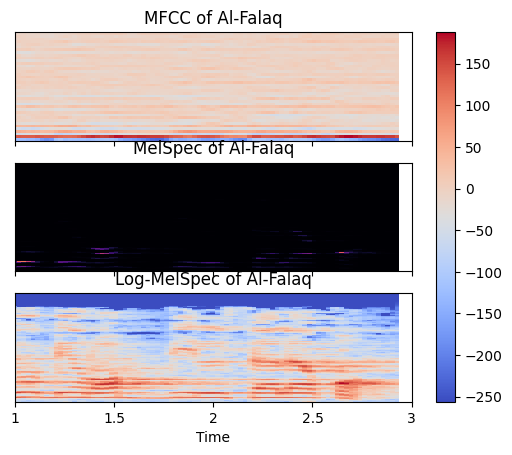

In [9]:
audio_path = audio_dataset_path + "fold113/file3_2.wav"
(xf, sr) = librosa.load(audio_path)

mfccs = librosa.feature.mfcc(y=xf, sr=16000, n_mfcc=40)

melspec = librosa.feature.melspectrogram(y=xf, sr=16000, n_mels=128)

logmelspecs = librosa.power_to_db(melspec)



fig, ax = plt.subplots (nrows=3,ncols=1,sharex=True)

img1 = librosa.display.specshow(mfccs, x_axis="time", ax=ax[0])
ax[0].set(title='MFCC of Al-Falaq')

img2 = librosa.display.specshow(melspec, x_axis="time", ax=ax[1])
ax[1].set(title='MelSpec of Al-Falaq')

img3 = librosa.display.specshow(logmelspecs, x_axis="time", ax=ax[2])
ax[2].set(title='Log-MelSpec of Al-Falaq')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1], ax[2]])

# # Or have individual colorbars:
# fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3

Save Features into X and Classes into Y and save as npy file

- Run one by one and comment the others

Save MFCC data

In [10]:
X = []
for i in range(len(mfcc_extracted_features)):
    X.append(mfcc_extracted_features[i][0])
    
X = np.array(X)   



Y = []
for i in range(len(mfcc_extracted_features)):
    Y.append(mfcc_extracted_features[i][1])
    
Y = np.array(Y)   


np.save('mfcc_X_data', X)
np.save('mfcc_Y_data', Y) 

Save Melspectrogram data

In [11]:
X = []
for i in range(len(melspec_extracted_features)):
    X.append(melspec_extracted_features[i][0])
    
X = np.array(X)    



Y = []
for i in range(len(melspec_extracted_features)):
    Y.append(melspec_extracted_features[i][1])
    
Y = np.array(Y)   

np.save('melspec_X_data', X)
np.save('melspec_Y_data', Y)

Save Log-Melspectrogram data

In [12]:
X = []
for i in range(len(log_melspec_extracted_features)):
    X.append(log_melspec_extracted_features[i][0])
    
X = np.array(X)    

Y = []
for i in range(len(log_melspec_extracted_features)):
    Y.append(log_melspec_extracted_features[i][1])
    
Y = np.array(Y)   

np.save('log_melspec_X_data', X)
np.save('log_melspec_Y_data', Y)